# **INTRODUCCIÓN**

El conjunto de datos contiene extracciones estadísticas de datos EMG, que han sido recogidos de un grupo de sujetos realizando tres tipos de gestos. Los datos EMG se recogen típicamente a través de electrodos colocados en la superficie de la piel sobre los músculos de interés. Estos datos son señales eléctricas que representan la actividad muscular, y su análisis puede proporcionar información sobre la intención del movimiento del sujeto.

# Clases en el conjunto de datos.
-Relax (class '0'): Datos recogidos cuando el sujeto está en estado de relajación, sin realizar movimientos específicos con las manos.

-Thumbs up (class '2'): Datos recogidos cuando el sujeto realiza el gesto de "pulgares arriba".

-Thumbs down (class '1'): Datos recogidos cuando el sujeto realiza el gesto de "pulgares abajo".

# Aplicaciones Potenciales.
Desarrollo de Prótesis: Estos datos pueden ser utilizados para desarrollar algoritmos que permitan controlar prótesis de mano. Los gestos como "pulgares arriba" y "pulgares abajo" podrían convertirse en comandos para realizar acciones específicas.
Rehabilitación: En rehabilitación, entender y clasificar correctamente estos gestos puede ayudar a monitorear el progreso de los pacientes y ajustar los tratamientos según sea necesario.
Interfaces de Usuario: La clasificación de gestos EMG puede emplearse para desarrollar interfaces de usuario más naturales e intuitivas, especialmente en entornos donde el uso de teclados o ratones es impracticable.

# **IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, ReLU, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
import seaborn as sns

# **LECTURA Y VISUALIZACIÓN DE DATOS**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia_artificial/thumbs.csv')

In [ ]:
df.shape

(3173, 2041)

In [ ]:
df['Label'].value_counts()

Label
1.0    1118
2.0    1090
0.0     965
Name: count, dtype: int64

# **TRANSFORMACIÓN Y DIVISIÓN DE DATOS EN TRAIN Y TEST**

In [ ]:
X = df.drop(['Label'], axis=1)
y = df['Label']
y=y.values.reshape(-1, 1)
y=y.astype(int)
y = to_categorical(y)
# Suponiendo que X e y ya están definidos
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **CREACIÓN, COMPILAMIENTO Y ENTRENAMIENTO DE MODELO DE CLASIFICACIÓN**

In [ ]:

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
178/178 [==============================] - 3s 11ms/step - loss: 3.4138 - accuracy: 0.5800 - val_loss: 1.7315 - val_accuracy: 0.5753
Epoch 2/20
178/178 [==============================] - 2s 9ms/step - loss: 0.9318 - accuracy: 0.7168 - val_loss: 1.6910 - val_accuracy: 0.6112
Epoch 3/20
178/178 [==============================] - 3s 14ms/step - loss: 0.8170 - accuracy: 0.7190 - val_loss: 1.2268 - val_accuracy: 0.6831
Epoch 4/20
178/178 [==============================] - 3s 15ms/step - loss: 0.4858 - accuracy: 0.8108 - val_loss: 1.1258 - val_accuracy: 0.7663
Epoch 5/20
178/178 [==============================] - 2s 10ms/step - loss: 0.3929 - accuracy: 0.8570 - val_loss: 1.3791 - val_accuracy: 0.7640
Epoch 6/20
178/178 [==============================] - 2s 9ms/step - loss: 0.3788 - accuracy: 0.8654 - val_loss: 1.1468 - val_accuracy: 0.8360
Epoch 7/20
178/178 [==============================] - 2s 10ms/step - loss: 0.3408 - accuracy: 0.8829 - val_loss: 1.1363 - val_accuracy: 0.8292
E

# **EVALUACIÓN**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

30/30 [==============================] - 0s 4ms/step - loss: 0.8900 - accuracy: 0.8414
Loss: 0.8900063633918762, Accuracy: 0.8413865566253662


# **VISUALIZACIÓN DE RESULTADOS**

30/30 [==============================] - 0s 3ms/step


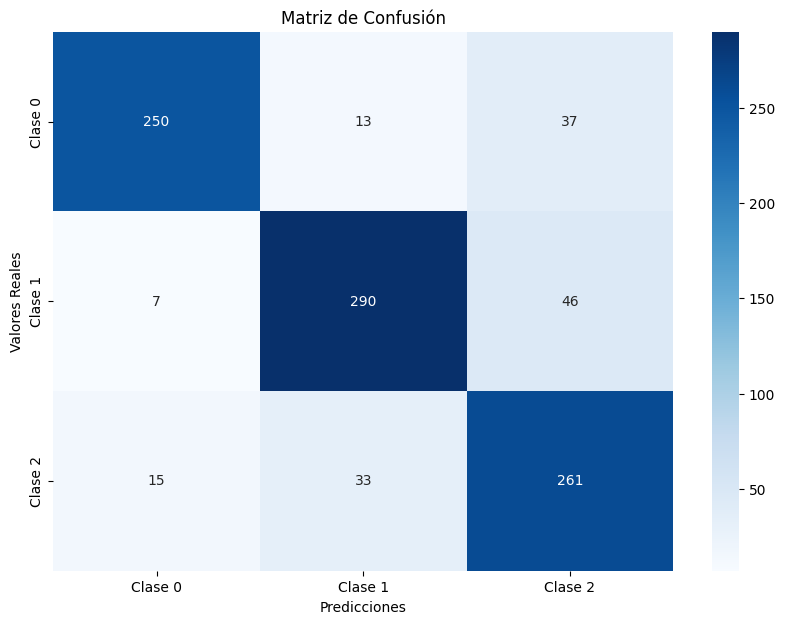

In [ ]:

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_test, predictions)

# Etiquetas de las clases para la matriz de confusión
class_labels = ['Clase 0', 'Clase 1', 'Clase 2']  # Ajusta esto a tus etiquetas de clase

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()